In [ ]:
# Импорт необходимых библиотек
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

# Загрузка данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Предобработка данных
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0  # Преобразование в одномерный массив и нормализация
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Разделение на валидационную выборку
x_val = x_train[-6000:]  # 6K для валидации
y_val = y_train[-6000:]
x_train = x_train[:-6000]  # Оставшиеся 54K для обучения
y_train = y_train[:-6000]

# Архитектура 1: Однослойный персептрон
model1 = Sequential()
model1.add(Input(shape=(784,)))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Оценка на тестовых данных
_, test_acc1 = model1.evaluate(x_test, y_test)
print(f'Test accuracy for model 1: {test_acc1}')

# Архитектура 2: Многослойный персептрон с 50 нейронами в первом слое
model2 = Sequential()
model2.add(Input(shape=(784,)))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Оценка на тестовых данных
_, test_acc2 = model2.evaluate(x_test, y_test)
print(f'Test accuracy for model 2: {test_acc2}')

# Архитектура 3: Многослойный персептрон с двумя скрытыми слоями по 50 нейронов
model3 = Sequential()
model3.add(Input(shape=(784,)))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Оценка на тестовых данных
_, test_acc3 = model3.evaluate(x_test, y_test)
print(f'Test accuracy for model 3: {test_acc3}')

# Подготовка данных для CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# Архитектура 4: Сверточная нейронная сеть (CNN)
model4 = Sequential()
model4.add(Input(shape=(28,28,1)))
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.fit(x_train_cnn[:54000], y_train[:54000], epochs=10,
           validation_data=(x_val.reshape(-1 ,28 ,28 ,1), y_val))

# Оценка на тестовых данных CNN
_, test_acc4 = model4.evaluate(x_test_cnn,y_test)
print(f'Test accuracy for model 4: {test_acc4}')

# Сравнение результатов всех моделей
print(f'Accuracy of Model 1: {test_acc1}')
print(f'Accuracy of Model 2: {test_acc2}')
print(f'Accuracy of Model 3: {test_acc3}')
print(f'Accuracy of Model 4 (CNN): {test_acc4}')

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6679 - loss: 1.0308 - val_accuracy: 0.8353 - val_loss: 0.4876
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8370 - loss: 0.4790 - val_accuracy: 0.8473 - val_loss: 0.4421
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8513 - loss: 0.4343 - val_accuracy: 0.8462 - val_loss: 0.4383
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8557 - loss: 0.4182 - val_accuracy: 0.8533 - val_loss: 0.4190
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8589 - loss: 0.4069 - val_accuracy: 0.8567 - val_loss: 0.4110
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8606 - loss: 0.4069 - val_accuracy: 0.8495 - val_loss: 0.4322
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8653 - loss: 0.3930 - val_accuracy: 0.8590 - val_loss: 0.4102
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8662 - loss: 0.3919 - 

Вывод

Модель 1:
Тестовая точность: 85.15%
Модель показывает стабильные результаты, но не достигает высоких значений точности.

Модель 2:
Тестовая точность: 87.24%
Эта модель демонстрирует заметное улучшение по сравнению с первой моделью, что может указывать на более эффективную архитектуру или гиперпараметры.
Модель 3:

Тестовая точность: 87.22%
Результаты модели 3 немного лучше, чем у модели 2, что говорит о том, что изменения в архитектуре или параметрах могут быть полезными.
Модель 4 (CNN):

Тестовая точность: 82.14%
Несмотря на использование сверточной нейронной сети (CNN), эта модель показала худшие результаты по сравнению с моделями 2 и 3. Это может указывать на необходимость доработки архитектуры CNN или настройки гиперпараметров

Модели 2 и 3 показывают наилучшие результаты, с тестовой точностью выше 87%. Это говорит о том, что они лучше справляются с задачей классификации.

Модель 4, несмотря на использование CNN, не смогла достичь конкурентоспособных результатов и требует дальнейшей оптимизации.


**Вариант 6**

Архитектура нейронной сети

Структура: 3-2-1

Скорость обучения: 0.2

X = {0.4;0.7;1.3}

W1={0.4 -0.7; 1.2 0.6; 0.1 0.5; -1.4 0.5}

W2={0.8;0.3;0.5}

Y=0.7



In [ ]:
import numpy as np

# Логистическая функция активации
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Производная логистической функции активации
def sigmoid_derivative(x):
    return x * (1 - x)

# Параметры сети
learning_rate = 0.2

# Входные данные и эталонный выход
X = np.array([[0.4], [0.7], [1.3]])
Y = np.array([[0.7]])

# Инициализация весов случайными значениями из интервала [-0.3, 0.3]
np.random.seed(42) # Для воспроизводимости
W1 = np.random.uniform(-0.3, 0.3, (3, 2))
W2 = np.random.uniform(-0.3, 0.3, (2, 1))

# Обучение сети
for epoch in range(10000): # Количество эпох
    # Прямое распространение
    hidden_input = np.dot(X.T, W1) # Вход скрытого слоя
    hidden_output = sigmoid(hidden_input) # Выход скрытого слоя

    final_input = np.dot(hidden_output, W2) # Вход выходного слоя
    final_output = sigmoid(final_input) # Выход сети

    # Ошибка на выходе
    error = Y - final_output

    # Обратное распространение ошибки
    d_final_output = error * sigmoid_derivative(final_output) # Ошибка на выходе

    error_hidden_layer = d_final_output.dot(W2.T) # Ошибка на скрытом слое
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output) # Ошибка на скрытом слое

    # Обновление весов
    W2 += hidden_output.T.dot(d_final_output) * learning_rate # Обновление весов выходного слоя
    W1 += X.dot(d_hidden_layer) * learning_rate # Обновление весов скрытого слоя

# Результат после обучения
print("Входной вектор:", X)
print("Веса W1:\n", W1)
print("Веса W2:", W2)
print("Выход после обучения:", final_output)
print("Эталонный выход:", Y)
print("Ошибка:", error)



Входной вектор: [[0.4]
 [0.7]
 [1.3]]
Веса W1:
 [[-0.0619933   0.36661123]
 [ 0.16244097  0.22751471]
 [-0.16322027  0.1061903 ]]
Веса W2: [[0.44140797]
 [1.05085349]]
Выход после обучения: [[0.7]]
Эталонный выход: [[0.7]]
Ошибка: [[4.4408921e-16]]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7958 - loss: 0.0393
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9324 - loss: 0.0121
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9501 - loss: 0.0088
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9586 - loss: 0.0073
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9672 - loss: 0.0060
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9728 - loss: 0.0051
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9768 - loss: 0.0045
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9801 - loss: 0.0040
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9811 - loss: 0.0036
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0031


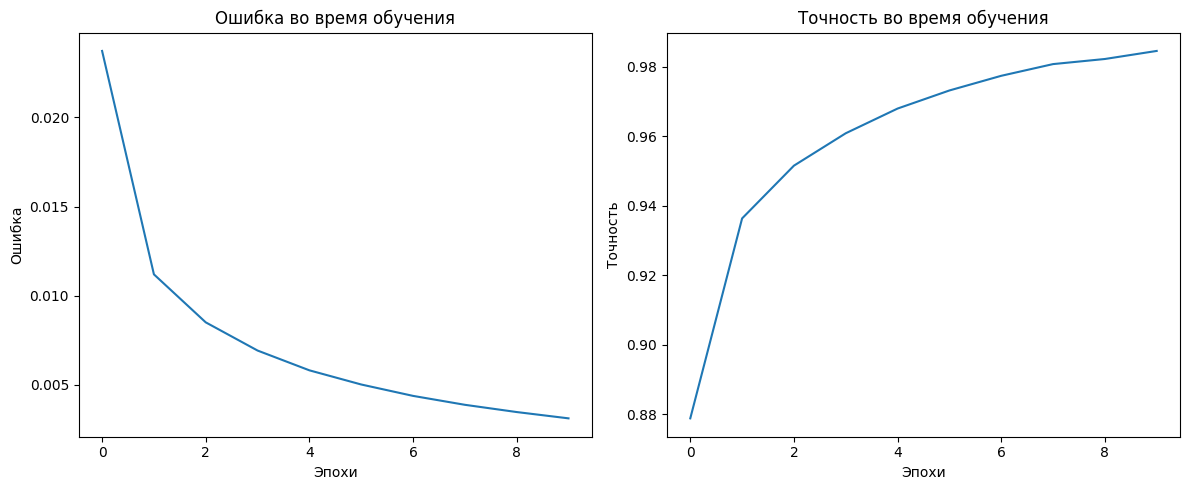

Тестовая точность: 0.9743000268936157
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


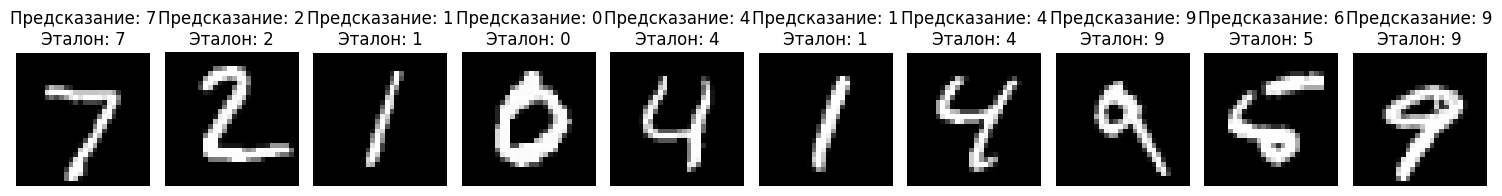

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Параметры сети
learning_rate = 0.2
epochs = 10

# Загрузка данных MNIST
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Предобработка данных: преобразование в одномерный массив и нормализация
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Преобразование в одномерный массив и нормализация
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Преобразование меток в one-hot encoding
Y_train_one_hot = to_categorical(Y_train, num_classes=10)

# Создание модели
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(784,)))  # Входной слой (784 нейрона) -> скрытый слой (128 нейронов)
model.add(Dense(10, activation='sigmoid'))  # Скрытый слой (128 нейронов) -> выходной слой (10 нейронов)

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Обучение модели с сохранением истории обучения
history = model.fit(X_train, Y_train_one_hot, epochs=epochs, batch_size=32, verbose=1)

# Визуализация результатов обучения

# График изменения ошибки во время обучения
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('Ошибка во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')

# График изменения точности во время обучения
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.title('Точность во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')

plt.tight_layout()
plt.show()

# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(X_test, to_categorical(Y_test), verbose=0)
print(f'Тестовая точность: {test_accuracy}')

# Визуализация результатов на тестовых данных

# Получаем предсказания модели на тестовых данных после завершения обучения.
test_predictions = np.argmax(model.predict(X_test), axis=1)

# Визуализируем результаты.
n_visualize = 10  # Количество изображений для визуализации

plt.figure(figsize=(15,5))
for i in range(n_visualize):
    plt.subplot(2,n_visualize,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f'Предсказание: {test_predictions[i]}\nЭталон: {Y_test[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

**Контрольные вопросы:**

1.Понятие нейронной сети, архитектуры

•	Нейронная сеть – вычислительная система, вдохновленная структурой и функционированием биологических нейронных сетей. Она состоит из взаимосвязанных узлов (нейронов), организованных в слои.

•	Архитектура нейронной сети определяет структуру сети, включая количество слоев, количество нейронов в каждом слое, тип связей между нейронами и функцию активации. Существуют различные типы архитектур, такие как многослойный перцептрон (MLP), сверточные нейронные сети (CNN) и рекуррентные нейронные сети (RNN).


2. Обучение нейронной сети

•	Обучение нейронной сети – процесс настройки весов соединений между нейронами таким образом, чтобы сеть могла выполнять определенную задачу. Обычно это делается путем предоставления сети большого количества примеров данных и использования алгоритма оптимизации (например, обратного распространения ошибки) для минимизации ошибки между предсказаниями сети и фактическими значениями.


3. Основные определения: скорость обучения, эпоха, нейрон, обучающая выборка, тестовая выборка, вариационная выборка, функция активаци

•	Скорость обучения (Learning Rate) – параметр, определяющий величину шага при обновлении весов во время обучения. Слишком высокая скорость обучения может привести к нестабильности, а слишком низкая – к медленной сходимости.

•	Эпоха (Epoch) – один полный проход через весь обучающий набор данных.

•	Нейрон (Neuron) – основной строительный блок нейронной сети, который принимает входные сигналы, обрабатывает их и выдает выходной сигнал.

•	Обучающая выборка (Training Set) – набор данных, используемый для обучения нейронной сети.

•	Тестовая выборка (Test Set) – набор данных, используемый для оценки производительности обученной нейронной сети на новых, ранее невиданных данных.

•	Вариационная выборка (Validation Set) – набор данных, используемый для настройки гиперпараметров нейронной сети и предотвращения переобучения.

•	Функция активации (Activation Function) – математическая функция, применяемая к выходу нейрона для внесения нелинейности в модель. Примеры: сигмоида, ReLU, tanh.


4. Алгоритм обратного распространения ошибки

Алгоритм обратного распространения ошибки (Backpropagation) – это метод обучения нейронных сетей, основанный на градиентном спуске. Он работает следующим образом:

1.	Прямое распространение: Сигнал проходит через сеть от входного слоя к выходному, вычисляя выходные значения каждого нейрона.

2.	Вычисление ошибки: Рассчитывается разница между предсказанным выходом и фактическим значением.

3.	Обратное распространение: Ошибка распространяется обратно по сети, начиная с выходного слоя. На каждом слое вычисляются градиенты ошибки относительно весов соединений.

4.	Обновление весов: Веса обновляются с использованием градиентов и скорости обучения, чтобы уменьшить ошибку.


5. Типы функций активации

•	Сигмоида (Sigmoid): Выдает значения в диапазоне (0, 1). Часто используется в выходном слое для задач бинарной классификации.

•	ReLU (Rectified Linear Unit): Выдает 0 для отрицательных
значений и само значение для положительных. Широко используется в скрытых слоях.

•	Tanh (Hyperbolic Tangent): Выдает значения в диапазоне (-1, 1).

•	Softmax: Преобразует вектор чисел в распределение вероятностей. Часто используется в выходном слое для задач мультиклассовой классификации.


6. Алгоритмы обучения

•	Градиентный спуск (Gradient Descent): Базовый алгоритм оптимизации, который итеративно обновляет веса в направлении наименьшего градиента функции потерь.

•	Стохастический градиентный спуск (Stochastic Gradient Descent - SGD): Обновляет веса после обработки каждого отдельного примера данных.

•	Mini-batch Gradient Descent: Обновляет веса после обработки небольшого пакета примеров данных.

•	Adam: Адаптивный алгоритм оптимизации, который сочетает преимущества SGD и Momentum.

•	RMSprop: Еще один адаптивный алгоритм оптимизации, который использует экспоненциально взвешенное скользящее среднее квадратов градиентов.
